## Packages and Assets

In [1]:
import keras.models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import tokenizer_from_json
from keras.utils import pad_sequences
import pandas as pd


import plotly.express as px



## Functions

In [2]:
def viewPredictedRows(X_test_text, y_test, y_pred):
    df = pd.DataFrame({'y_real': y_test, 'y_pred': y_pred})
    df['correto'] = df['y_real'] == df['y_pred']
    df['classificação'] = df['correto'].apply(lambda x: 'Correta' if x else 'Incorreta')
    df['title'] = X_test_text
    df = df[['title', 'y_real', 'y_pred','classificação']].sample(10)
    return df


In [3]:
def show_confusion_matrix(cm):
        print("Matriz de Confusão")
        plt.figure(figsize=(10, 7))
        classes = ['Outros', 'Petrobras', 'Vale', 'Itaú']

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes,
                    yticklabels=classes)
        plt.xlabel('Predição')
        plt.ylabel('Real')
        plt.title('Matriz de Confusão')
        plt.show()

In [4]:
def show_graph_metrics(y_test, y_pred, modelo):
    df_metrics = pd.DataFrame(index=['Outros', 'Petrobras', 'Vale', 'Itaú'])
    df_metrics['Acurácia'] = accuracy_score(y_true=y_test, y_pred=y_pred)
    df_metrics['Precisão'] = precision_score(y_true=y_test, y_pred=y_pred, average=None)
    df_metrics['Recall'] = recall_score(y_true=y_test, y_pred=y_pred, average=None)
    df_metrics['F1-Score'] = f1_score(y_true=y_test, y_pred=y_pred, average=None)
    fig = px.bar(df_metrics, height=500, width=750,  x=df_metrics.index, y=["Acurácia", "Precisão", "Recall", "F1-Score"],
             barmode="group", title=f"Desempenho do {modelo}", labels={'index': 'Classes', 'value': 'Porcentagem (%)', 'variable': 'Métricas'})

    fig.show()

def show_average_metrics(y_test, y_pred, modelo):
    print(f"Average Metrics for {modelo}")
    print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred))
    print("Precision: ", precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
    print("Recall: ", recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
    print("F1-Score: ", f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

In [5]:
def index2word(word_index):
    index_word = {}
    for key in word_index:
        index_word[word_index[key]] = key
    return index_word


def seq2text(seq, index_word):
    text = []
    for index in seq:
        text.append(index_word[index])
    return text




## Dependencies

In [6]:
# test_padded = pd.read_csv('../../assets/data/splits/test/padded.csv')
test_pp = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')
test_pp

,title,tags,link,label
0,vale vale3 informa pagara <NUM> bilhoes linhas...,"['linha de crédito', 'Vale (VALE3)']",https://www.suno.com.br/noticias/vale-vale3-pa...,2
1,vale siderurgicas sobem trump sinalizando adia...,"['China', 'Donald Trump', 'Empresas', 'EUA', '...",https://www.moneytimes.com.br/vale-e-siderurgi...,2
2,cade aponta praticas anticompetitivas br raize...,"['Ações', 'Aeroportos', 'Aviação', 'BP', 'BR D...",https://www.moneytimes.com.br/cade-aponta-prat...,1
3,interrupcao leilao biodiesel impediu precos ca...,"['ANP', 'Biocombustível', 'Biodiesel', 'Brasil...",https://www.moneytimes.com.br/interrupcao-do-l...,1
4,ibovespa sobe <NUM> cento exterior puxado petr...,"['Petrobras (PETR4)', 'BB Seguridade (BBSE3)',...",https://www.suno.com.br/noticias/ibovespa-sobe...,1
...,...,...,...,...
1797,weg wege3 pagara milhoes jcp ameaca greve cami...,"['Weg (WEGE3)', 'Magazine Luiza (MGLU3)', 'Oi ...",https://www.suno.com.br/noticias/weg-wege3-div...,1
1798,vale renova mandato schvartsman dois anos,"['Fabio Schvartsman', 'Mercados', 'Vale']",https://www.moneytimes.com.br/vale-renova-mand...,2
1799,petrobras confirma ipo br listagem novo mercado,"['BR Distribuidora', 'Empresas', 'IPO', 'Petro...",https://www.moneytimes.com.br/petrobras-confir...,1
1800,dolar abre queda <NUM> cento apos dados desemp...,"['bce', 'Desemprego', 'dólar', 'EUA', 'Tesouro...",https://www.sunoresearch.com.br/noticias/dolar...,0


In [7]:
lstm_model = keras.models.load_model('../../assets/deep_assets/lstm_model')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 300)           3123600   
                                                                 
 lstm_2 (LSTM)               (None, 11, 64)            93440     
                                                                 
 dropout_2 (Dropout)         (None, 11, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 3,254,484
Trainable params: 130,884
Non-

In [8]:
bilstm_model = keras.models.load_model('../../assets/deep_assets/bilstm_model')
bilstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 300)           3123600   
                                                                 
 bidirectional_2 (Bidirectio  (None, 11, 32)           40576     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 11, 32)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                

In [9]:
# Load the tokenizer from the file
with open('../../assets/deep_assets/tokenizer.json', 'r', encoding='utf-8') as f:
    tokenizer_json = f.read()
    tokenizer = tokenizer_from_json(tokenizer_json)
    word_index = tokenizer.word_index

## Predictions

### Preparing Input

In [10]:
X_test = test_pp.title
y_test = test_pp.to_numpy()[:, -1]


test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=11, padding='post', truncating='post')
test_padded

array([[   5,   18,  476, ..., 2629,    0,    0],
       [   5,  348,  322, ...,    0,    0,    0],
       [ 170,  231, 1918, ..., 1391,    0,    0],
       ...,
       [   3,  256,   92, ...,    0,    0,    0],
       [  29,   57,   12, ...,   42,    0,    0],
       [   5,    6,  237, ...,    0,    0,    0]])

### Best LSTM Model

#### Predict

In [11]:
index_word = index2word(word_index)
pred_prob = lstm_model.predict(test_padded)
# y_pred = [1 if p > 0.5 else 0 for p in pred_prob]
y_pred = np.argmax(pred_prob, axis=1)

57/57 [==============================] - 1s 6ms/step


#### Results

In [12]:
X_test = list(X_test)
y_test = list(y_test)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       574
           1       0.89      0.82      0.85       679
           2       0.89      0.79      0.84       351
           3       0.76      0.63      0.69       198

    accuracy                           0.82      1802
   macro avg       0.82      0.79      0.80      1802
weighted avg       0.83      0.82      0.82      1802

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       574
           1       0.89      0.82      0.85       679
           2       0.89      0.79      0.84       351
           3       0.76      0.63      0.69       198

    accuracy                           0.82      1802
   macro avg       0.82      0.79      0.80      1802
weighted avg       0.83      0.82      0.82      1802

Average Metrics for LSTM
Accuracy:  0.8213096559378469
Precision:  0.8206237702544852
Recall:  0.7877398807434008
F1-Score:  0.799

Matriz de Confusão


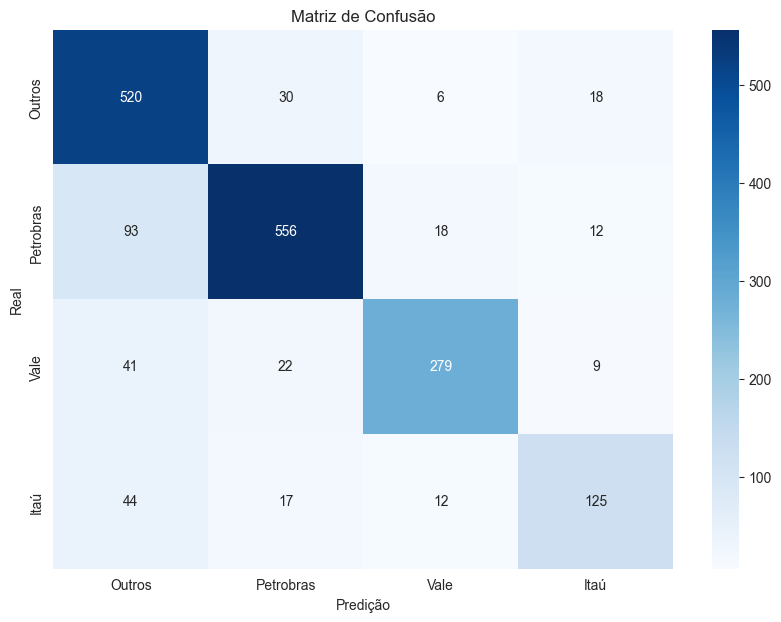

,title,y_real,y_pred,classificação
1750,irb brasil acumula alta <NUM> cento desde ofer...,3,1,Incorreta
486,petrobras petr4 atendera todos postos gasolina...,1,1,Correta
1225,ibovespa b3 divulga segunda previa carteira te...,0,1,Incorreta
1627,guide mantem aposta irb bb petrobras gpa brask...,1,1,Correta
903,petrobras petr4 alerta governo federal sobre r...,1,1,Correta
167,cvm expoe inqueritos processos envolvendo petr...,1,1,Correta
482,petrobras inicia fase vinculante venda ativos ...,1,1,Correta
853,comissao discute cumprimento acordo vale gover...,2,2,Correta
881,empresas maquininhas perdem <NUM> bi bolsa,3,1,Incorreta
343,indexados tesouro direto operam instaveis nest...,0,0,Correta


In [17]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))
show_average_metrics(y_test,y_pred, 'LSTM')
show_graph_metrics(y_test, y_pred, 'LSTM')
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)
df_results = viewPredictedRows(X_test, y_test, y_pred)
df_results

### Best BiLSTM Model

#### Predict

In [14]:
index_word = index2word(word_index)
pred_prob = bilstm_model.predict(test_padded)
# y_pred = [1 if p > 0.5 else 0 for p in pred_prob]
y_pred = np.argmax(pred_prob, axis=1)

57/57 [==============================] - 3s 6ms/step


#### Results

In [15]:
X_test = list(X_test)
y_test = list(y_test)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       574
           1       0.89      0.82      0.85       679
           2       0.89      0.79      0.84       351
           3       0.76      0.63      0.69       198

    accuracy                           0.82      1802
   macro avg       0.82      0.79      0.80      1802
weighted avg       0.83      0.82      0.82      1802

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       574
           1       0.89      0.82      0.85       679
           2       0.89      0.79      0.84       351
           3       0.76      0.63      0.69       198

    accuracy                           0.82      1802
   macro avg       0.82      0.79      0.80      1802
weighted avg       0.83      0.82      0.82      1802

Average Metrics for Bi-LSTM
Accuracy:  0.8213096559378469
Precision:  0.8206237702544852
Recall:  0.7877398807434008
F1-Score:  0.

Matriz de Confusão


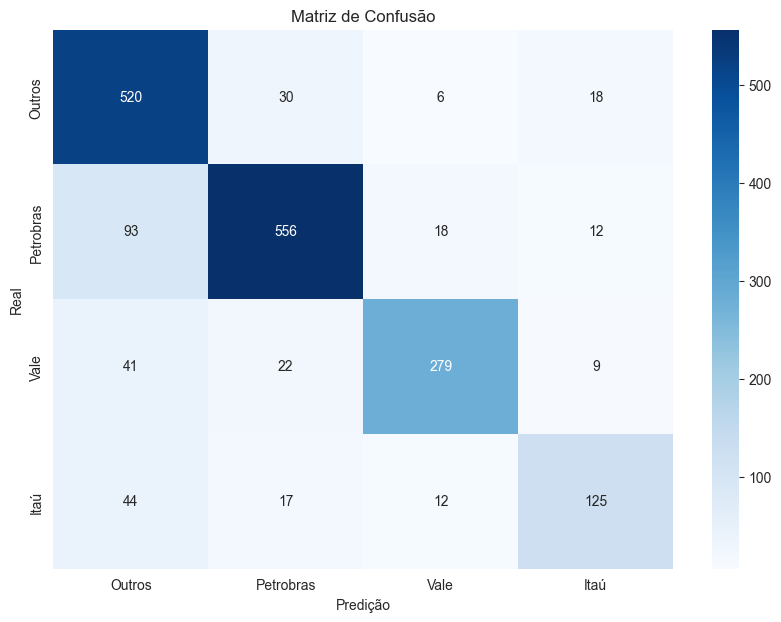

,title,y_real,y_pred,classificação
102,copel fecha alta <NUM> cento apos acordo retom...,1,0,Incorreta
331,lojas americanas cresce <NUM> cento receita br...,0,0,Correta
209,azul azul4 chega cair <NUM> cento apos anuncio...,0,0,Correta
715,bolsonaro assina mp libera venda direta combus...,1,1,Correta
1465,petrobras lista privatizacoes primeiro mandato...,1,1,Correta
99,itau nova parceria apple permite troca iphone ...,3,3,Correta
1589,petrobras desiste vender campo marlim bacia ca...,1,1,Correta
148,ibovespa fecha queda <NUM> cento saida preside...,2,2,Correta
1175,reforma imposto renda pode aumentar lucro banc...,3,3,Correta
1432,petrobras diz fundos pensao lista requerente a...,1,1,Correta


In [16]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))
show_average_metrics(y_test,y_pred, 'Bi-LSTM')
show_graph_metrics(y_test, y_pred, 'Bi-LSTM')
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)
display(viewPredictedRows(X_test, y_test, y_pred))